In [18]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import plotly.express as pe

In [4]:
df = pd.DataFrame({
    "marks" : [50,55,60,75,200],
    "hours" : [1,2,3,2.5,20]
})
df

,marks,hours
0,50,1.0
1,55,2.0
2,60,3.0
3,75,2.5
4,200,20.0


{'whiskers': [<matplotlib.lines.Line2D at 0x78a7ee6dc280>,
 'caps': [<matplotlib.lines.Line2D at 0x78a7ee6dfb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x78a7ee6dc0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x78a7ee6de050>],
 'fliers': [<matplotlib.lines.Line2D at 0x78a7ee6deef0>],
 'means': []}

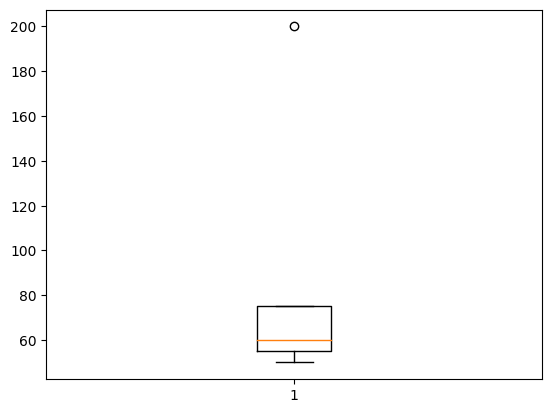

In [6]:
sns.boxplot(x = df["marks"])

{'whiskers': [<matplotlib.lines.Line2D at 0x78a7ee98cf70>,
 'caps': [<matplotlib.lines.Line2D at 0x78a7ee98ed40>,
 'boxes': [<matplotlib.lines.Line2D at 0x78a7ee98cc40>],
 'medians': [<matplotlib.lines.Line2D at 0x78a7ee98e920>],
 'fliers': [<matplotlib.lines.Line2D at 0x78a7ee98f100>],
 'means': []}

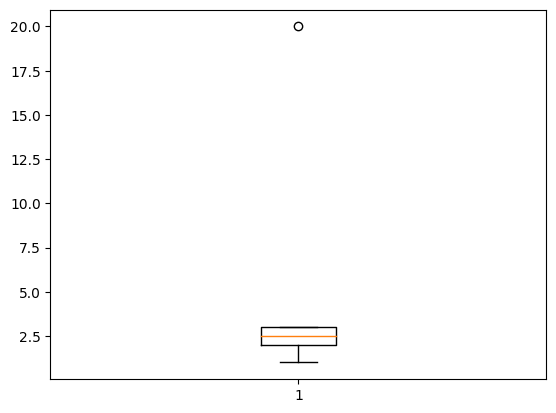

In [7]:
sns.boxplot(x = df["hours"])

In [8]:
#isolation forest for outlier detection 1 represt normal data point -1 represt outlier data points
iso = IsolationForest()
iso.fit(df)
ypred = iso.predict(df)
ypred

array([ 1,  1,  1,  1, -1])

In [9]:
df["Outliers"] = ypred

In [10]:
df

,marks,hours,Outliers
0,50,1.0,1
1,55,2.0,1
2,60,3.0,1
3,75,2.5,1
4,200,20.0,-1


# **now on data set**

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Isolation_data.csv")
df


,Frozen,Delicassen
0,214,1338
1,1762,1776
2,2405,7844
3,6404,1788
4,3915,5185
...,...,...
435,13135,2204
436,4510,2346
437,437,1867
438,1038,2125


In [14]:
df.describe()

,Frozen,Delicassen
count,440.000000,440.000000
mean,3071.931818,1524.870455
std,4854.673333,2820.105937
min,25.000000,3.000000
25%,742.250000,408.250000
50%,1526.000000,965.500000
75%,3554.250000,1820.250000
max,60869.000000,47943.000000


<Axes: xlabel='Frozen', ylabel='Delicassen'>

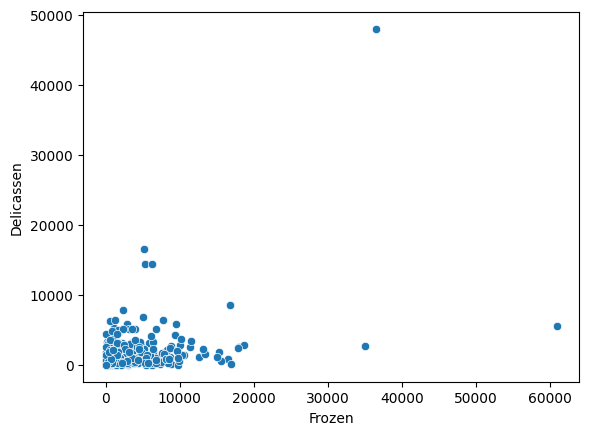

In [20]:
sns.scatterplot(df,x = df["Frozen"],y = df["Delicassen"])

In [21]:
iso = IsolationForest(random_state=1)
iso.fit(df)
ypred = iso.predict(df)
ypred

array([ 1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1

In [22]:
df["Outliers"] = ypred

In [23]:
df

,Frozen,Delicassen,Outliers
0,214,1338,1
1,1762,1776,1
2,2405,7844,-1
3,6404,1788,1
4,3915,5185,-1
...,...,...,...
435,13135,2204,-1
436,4510,2346,1
437,437,1867,1
438,1038,2125,1


In [25]:
df[df["Outliers"] == -1]

,Frozen,Delicassen,Outliers
2,2405,7844,-1
4,3915,5185,-1
17,839,4478,-1
22,9408,4334,-1
23,5154,16523,-1
24,2915,5778,-1
28,1158,5206,-1
36,1729,4626,-1
39,10002,2916,-1
40,9510,5864,-1


In [26]:
df["Outliers"].value_counts()

 1    382
-1     58
Name: Outliers, dtype: int64

In [28]:
pe.box(y = df["Frozen"])

In [29]:
pe.box(df["Delicassen"])

In [30]:
df.head()

,Frozen,Delicassen,Outliers
0,214,1338,1
1,1762,1776,1
2,2405,7844,-1
3,6404,1788,1
4,3915,5185,-1


# **Predictive Power Score**

In [31]:
df = pd.read_csv("https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Iris.csv",index_col = 0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [32]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=16f12d3306162a3d4e020ac7f98e60e9248bd48b937e9e4a67dd87d3f14fea70
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [33]:
import ppscore as ps

In [34]:
ps.score(x = "SepalLengthCm",y = "Species",df = df)

{'x': 'SepalLengthCm',
 'y': 'Species',
 'ppscore': 0.47164941668027915,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.35333333333333333,
 'model_score': 0.6583332894532472,
 'model': DecisionTreeClassifier()}

In [35]:
ps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,SepalLengthCm,SepalLengthCm,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,SepalLengthCm,SepalWidthCm,0.000000,regression,True,mean absolute error,0.327333,0.362073,DecisionTreeRegressor()
2,SepalLengthCm,PetalLengthCm,0.550575,regression,True,mean absolute error,1.488000,0.668745,DecisionTreeRegressor()
3,SepalLengthCm,PetalWidthCm,0.431163,regression,True,mean absolute error,0.645333,0.367090,DecisionTreeRegressor()
4,SepalLengthCm,Species,0.471649,classification,True,weighted F1,0.353333,0.658333,DecisionTreeClassifier()
5,SepalWidthCm,SepalLengthCm,0.001902,regression,True,mean absolute error,0.684667,0.683364,DecisionTreeRegressor()
6,SepalWidthCm,SepalWidthCm,1.000000,predict_itself,True,None,0.000000,1.000000,None
7,SepalWidthCm,PetalLengthCm,0.167773,regression,True,mean absolute error,1.488000,1.238354,DecisionTreeRegressor()
8,SepalWidthCm,PetalWidthCm,0.129681,regression,True,mean absolute error,0.645333,0.561646,DecisionTreeRegressor()
9,SepalWidthCm,Species,0.179145,classification,True,weighted F1,0.353333,0.469180,DecisionTreeClassifier()
